In [2]:
import sys
sys.path.append('../')
from src.data_processing import HyperspectralImage, OriginalImageDataset
from torch.utils.data import DataLoader
from src.models import Autoencoder
from src.train_utils import train_model
from src.conf import BATCH_SIZE
from src.loss_functions import sad_loss
import matplotlib.pyplot as plt
from src.metrics import compare_abundances, compare_endmembers
import torch

In [2]:
urban = HyperspectralImage(image_path="datasets/urban/Urban.mat",
                           ground_truth_path="datasets/urban/end6_groundTruth.mat",
                           n_bands=162, n_row=307, n_col=307, n_sources=6)

-------------------MODEL 1----------------------
Endmembers cosine similarity: 0.9006321758320044
Endmembers MSE: 0.35973181674796334


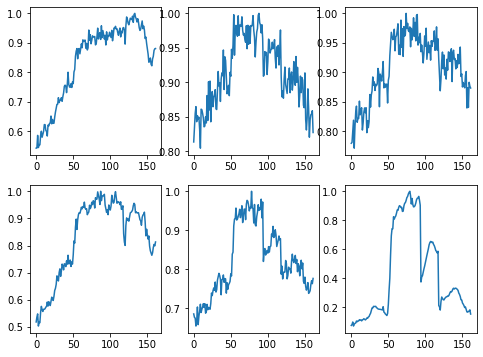

Abundances cosine similarity: 0.6464009857322831
Abundances MSE: 0.09267899700142192


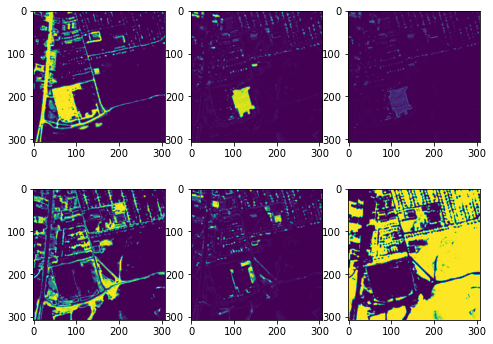

-------------------MODEL 2----------------------
Endmembers cosine similarity: 0.9231793465244276
Endmembers MSE: 0.1644373142578353


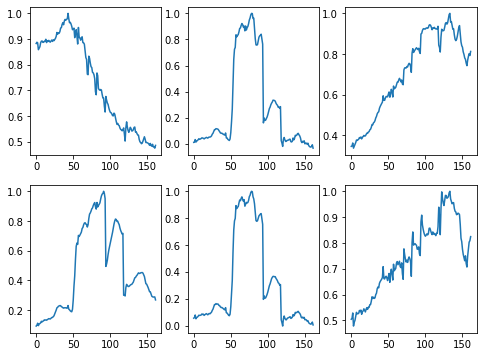

Abundances cosine similarity: 0.8439722642417751
Abundances MSE: 0.03850670075469454


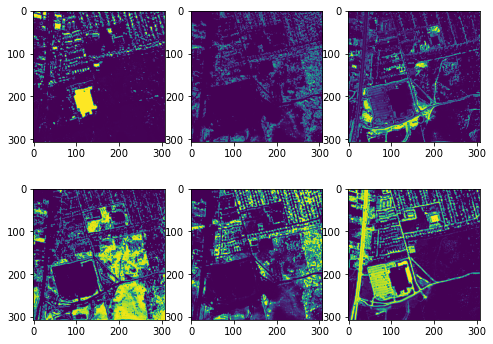

-------------------MODEL 3----------------------
Endmembers cosine similarity: 0.9232095625388503
Endmembers MSE: 0.16640645956540692


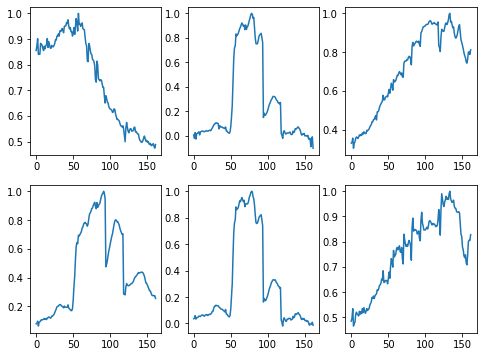

Abundances cosine similarity: 0.7710391999585263
Abundances MSE: 0.04555618257350076


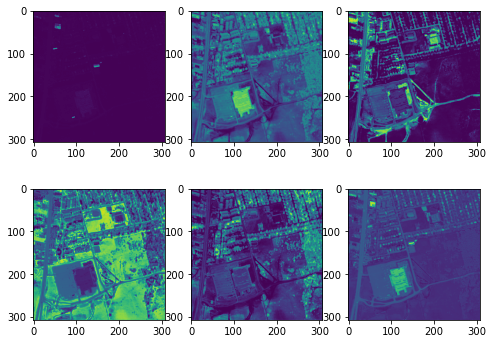

-------------------MODEL 4----------------------
Endmembers cosine similarity: 0.9235504750515908
Endmembers MSE: 0.15833663083052033


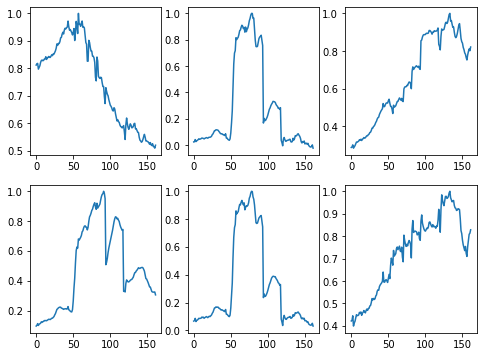

Abundances cosine similarity: 0.7399491141325413
Abundances MSE: 0.05181545477524206


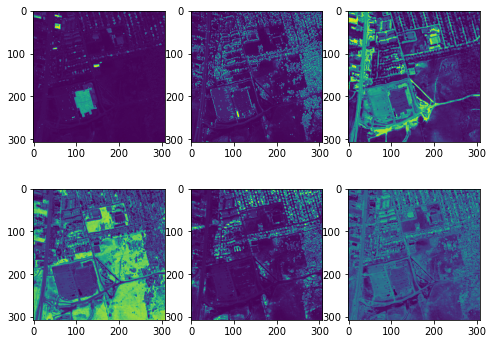

-------------------MODEL 5----------------------
Endmembers cosine similarity: 0.9223823086223056
Endmembers MSE: 0.17247153936042112


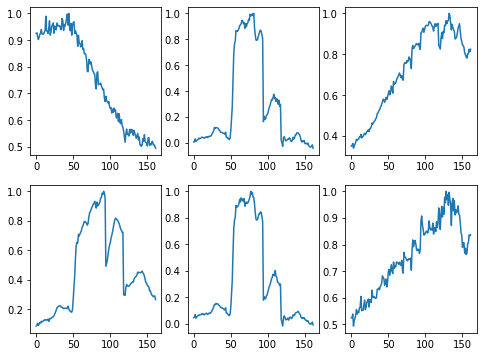

Abundances cosine similarity: 0.7887269336097846
Abundances MSE: 0.04249105962728623


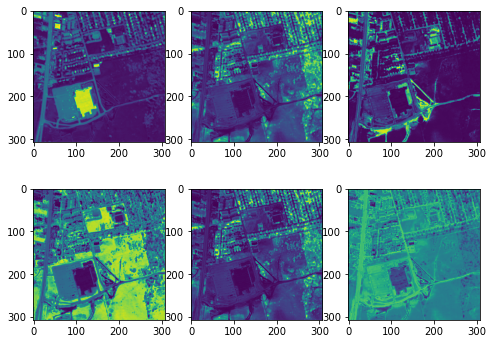

-------------------MODEL 6----------------------
Endmembers cosine similarity: 0.9247977342302853
Endmembers MSE: 0.16598717523294315


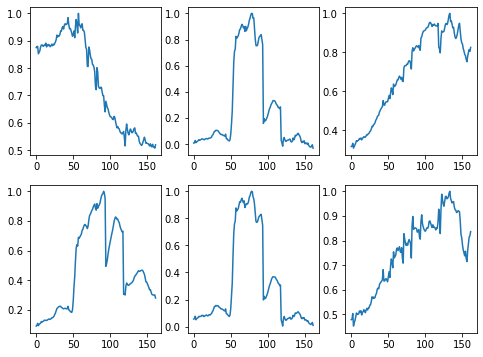

Abundances cosine similarity: 0.7852850984233645
Abundances MSE: 0.0439514905514669


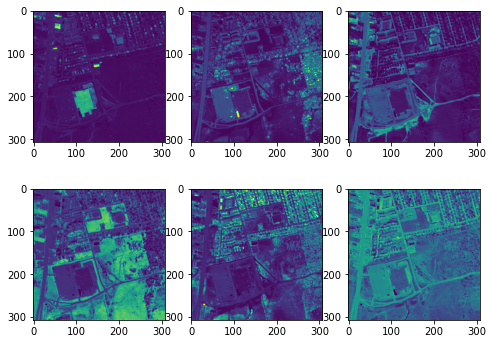

-------------------MODEL 7----------------------
Endmembers cosine similarity: 0.9234458716538413
Endmembers MSE: 0.17233808179866503


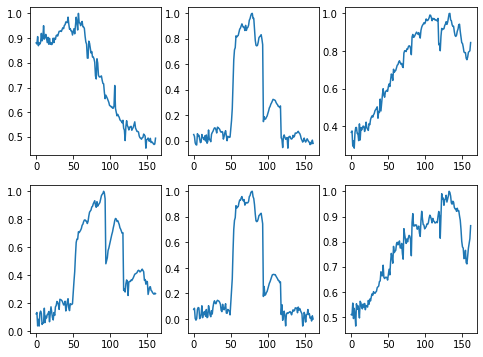

Abundances cosine similarity: 0.6323219491227033
Abundances MSE: 0.06861613118615624


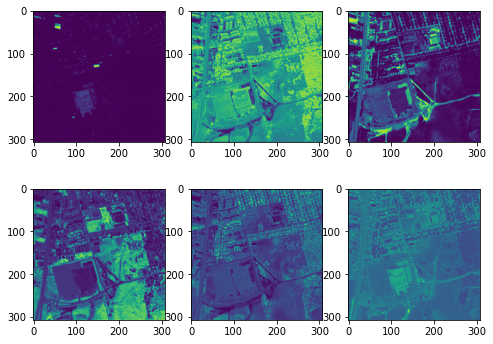

In [4]:
names = ['1_urban_original_no_patches.pth',
        '2_urban_original_patches.pth',
        '3_urban_simple_perturbed_no_patches.pth',
        '4_urban_simple_perturbed_patches.pth',
        '5_urban_sv_perturbed_no_patches.pth',
        '6_urban_perturbated_honest_patches.pth',
        '7_urban_sv_perturbed_random_patches.pth']

results = {}


for i, name in enumerate(names):
    print(f"-------------------MODEL {i+1}----------------------")
    model = Autoencoder(channel_number=urban.n_bands, source_number=urban.n_sources)
    model.load_state_dict(torch.load(f"results/models_weights/{name}", map_location=torch.device('cpu')))
    model.eval()

    X, A, S = model(torch.Tensor(urban.X[None, :, :, :]))
    X, A, S = X.detach().numpy()[0], A.detach().numpy(), S.detach().numpy()[0]

    if name not in results:
        results[name] = {'endmembers': {}, 'abundances': {}}
        
    cos_sim = compare_endmembers(urban, A, metric='cos_sim')
    print('Endmembers cosine similarity:', cos_sim)
    results[name]['endmembers']['cos_sim'] = cos_sim
    mse = compare_endmembers(urban, A, metric='mse')
    print('Endmembers MSE:', mse)
    results[name]['endmembers']['mse'] = mse
    
    plt.figure(figsize=(8,6))
    for ii in range(6): 
        ax = plt.subplot(2, 3, ii+1)
        ax.plot(A[:,ii])
    plt.show()

    cos_sim = compare_abundances(urban, S, metric='cos_sim')
    print('Abundances cosine similarity:', cos_sim)
    results[name]['abundances']['cos_sim'] = cos_sim
    mse = compare_abundances(urban, S, metric='mse')
    print('Abundances MSE:', mse)
    results[name]['abundances']['mse'] = mse
    plt.figure(figsize=(8,6))
    for ii in range(6): 
        ax = plt.subplot(2, 3, ii+1)
        ax.imshow(S[ii, :, :])  
    plt.show()

In [5]:
results

{'1_urban_original_no_patches.pth': {'endmembers': {'cos_sim': 0.9006321758320044,
   'mse': 0.35973181674796334},
  'abundances': {'cos_sim': 0.6464009857322831, 'mse': 0.09267899700142192}},
 '2_urban_original_patches.pth': {'endmembers': {'cos_sim': 0.9231793465244276,
   'mse': 0.1644373142578353},
  'abundances': {'cos_sim': 0.8439722642417751, 'mse': 0.03850670075469454}},
 '3_urban_simple_perturbed_no_patches.pth': {'endmembers': {'cos_sim': 0.9232095625388503,
   'mse': 0.16640645956540692},
  'abundances': {'cos_sim': 0.7710391999585263, 'mse': 0.04555618257350076}},
 '4_urban_simple_perturbed_patches.pth': {'endmembers': {'cos_sim': 0.9235504750515908,
   'mse': 0.15833663083052033},
  'abundances': {'cos_sim': 0.7399491141325413, 'mse': 0.05181545477524206}},
 '5_urban_sv_perturbed_no_patches.pth': {'endmembers': {'cos_sim': 0.9223823086223056,
   'mse': 0.17247153936042112},
  'abundances': {'cos_sim': 0.7887269336097846, 'mse': 0.04249105962728623}},
 '6_urban_perturbated_

In [5]:
samson = HyperspectralImage(image_path="../datasets/samson/samson_1.mat",
                           ground_truth_path="../datasets/samson/end3.mat",
                           n_bands=156, n_row=95, n_col=95, n_sources=3)

-------------------MODEL 8----------------------
Endmembers cosine similarity: 0.9971675745865681
Endmembers MSE: 0.0019206504212107786


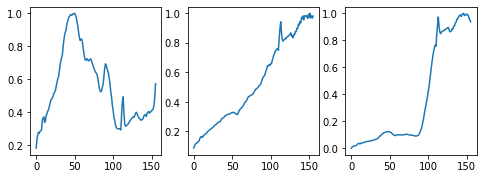

Abundances cosine similarity: 0.9229321014942423
Abundances MSE: 0.04850244732847549


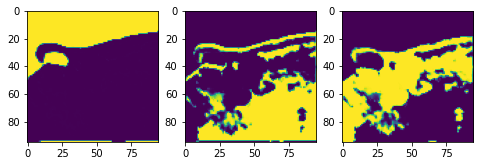

-------------------MODEL 9----------------------
Endmembers cosine similarity: 0.9955448428690902
Endmembers MSE: 0.0029488576576699923


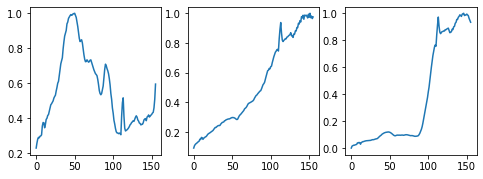

Abundances cosine similarity: 0.934713446849919
Abundances MSE: 0.0319712481889846


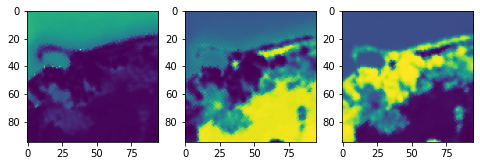

-------------------MODEL 10----------------------
Endmembers cosine similarity: 0.991405784165928
Endmembers MSE: 0.005648265742187363


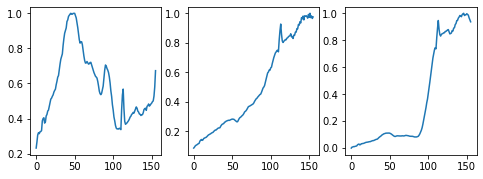

Abundances cosine similarity: 0.8238031888739116
Abundances MSE: 0.08429283640593782


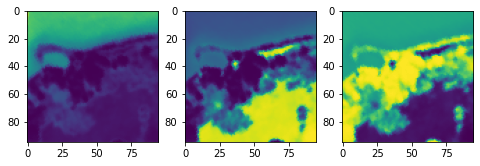

In [14]:
names = ['8_samson_original_patches.pth',
        '9_samson_simple_perturbed_patches_alpha_0.3.pth',
        '10_samson_sv_perturbed_honest_patches.pth']

results = {}


for i, name in enumerate(names):
    print(f"-------------------MODEL {i+8}----------------------")
    model = Autoencoder(channel_number=samson.n_bands, source_number=samson.n_sources)
    model.load_state_dict(torch.load(f"results/models_weights/{name}", map_location=torch.device('cpu')))
    model.eval()

    X, A, S = model(torch.Tensor(samson.X[None, :, :, :]))
    X, A, S = X.detach().numpy()[0], A.detach().numpy(), S.detach().numpy()[0]

    if name not in results:
        results[name] = {'endmembers': {}, 'abundances': {}}
        
    cos_sim = compare_endmembers(samson, A, metric='cos_sim')
    print('Endmembers cosine similarity:', cos_sim)
    results[name]['endmembers']['cos_sim'] = cos_sim
    mse = compare_endmembers(samson, A, metric='mse')
    print('Endmembers MSE:', mse)
    results[name]['endmembers']['mse'] = mse
    
    plt.figure(figsize=(8,6))
    for ii in range(3): 
        ax = plt.subplot(2, 3, ii+1)
        ax.plot(A[:,ii])
    plt.show()

    cos_sim = compare_abundances(samson, S, metric='cos_sim')
    print('Abundances cosine similarity:', cos_sim)
    results[name]['abundances']['cos_sim'] = cos_sim
    mse = compare_abundances(samson, S, metric='mse')
    print('Abundances MSE:', mse)
    results[name]['abundances']['mse'] = mse
    plt.figure(figsize=(8,6))
    for ii in range(3): 
        ax = plt.subplot(2, 3, ii+1)
        ax.imshow(S[ii, :, :])  
    plt.show()

-------------------ALPHA 0----------------------
Endmembers cosine similarity: 0.9555699900056751
Endmembers MSE: 0.04730358055444243


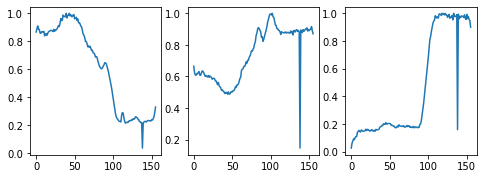

Abundances cosine similarity: 0.9056115680110042
Abundances MSE: 0.04529531801085152


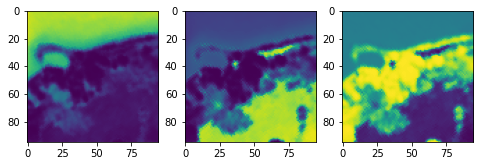

-------------------ALPHA 0.1----------------------
Endmembers cosine similarity: 0.9923749879301985
Endmembers MSE: 0.005094213784565662


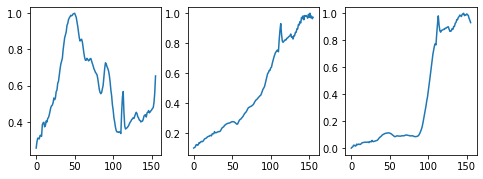

Abundances cosine similarity: 0.8230099636953245
Abundances MSE: 0.08417030217682638


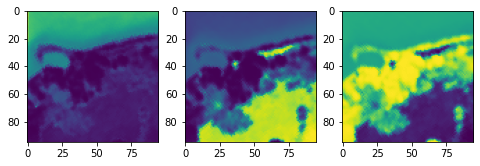

-------------------ALPHA 0.2----------------------
Endmembers cosine similarity: 0.9929030042343906
Endmembers MSE: 0.004818510012873355


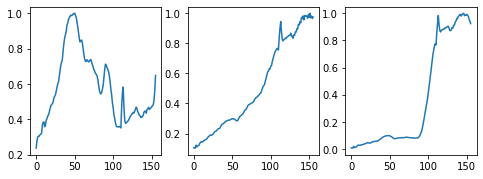

Abundances cosine similarity: 0.8091758601727689
Abundances MSE: 0.09120658736156363


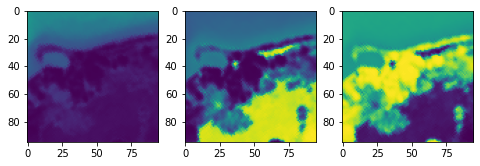

-------------------ALPHA 0.3----------------------
Endmembers cosine similarity: 0.9955448428690902
Endmembers MSE: 0.0029488576576699923


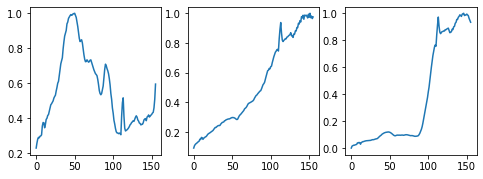

Abundances cosine similarity: 0.934713446849919
Abundances MSE: 0.0319712481889846


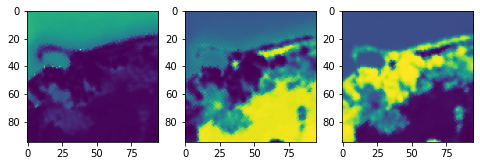

-------------------ALPHA 0.4----------------------
Endmembers cosine similarity: 0.9939511092021993
Endmembers MSE: 0.004067951030868293


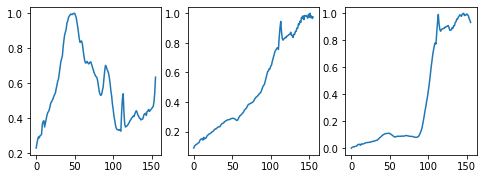

Abundances cosine similarity: 0.7608629937909313
Abundances MSE: 0.11924273290100844


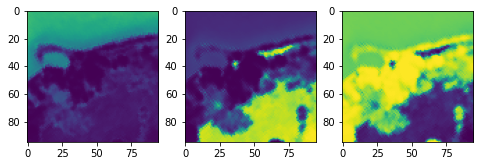

-------------------ALPHA 0.5----------------------
Endmembers cosine similarity: 0.9929743899486763
Endmembers MSE: 0.004812737439091044


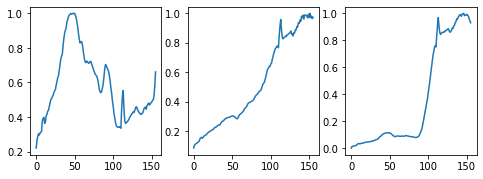

Abundances cosine similarity: 0.9481804970281597
Abundances MSE: 0.02611567365081981


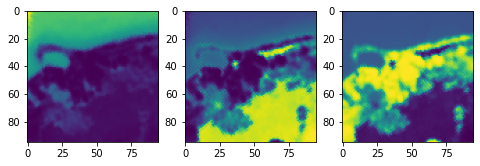

-------------------ALPHA 0.6----------------------
Endmembers cosine similarity: 0.9919027522163105
Endmembers MSE: 0.005352562752651443


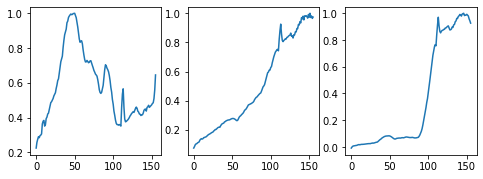

Abundances cosine similarity: 0.9066652365342707
Abundances MSE: 0.04483265242859444


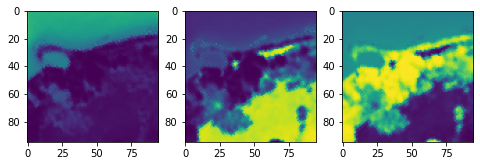

-------------------ALPHA 0.7----------------------
Endmembers cosine similarity: 0.9928768423409061
Endmembers MSE: 0.004793749389687496


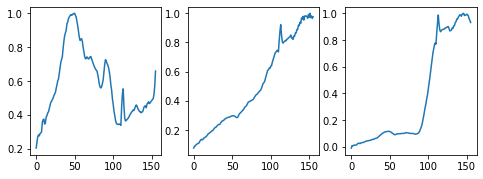

Abundances cosine similarity: 0.7892406382892185
Abundances MSE: 0.10654389637735859


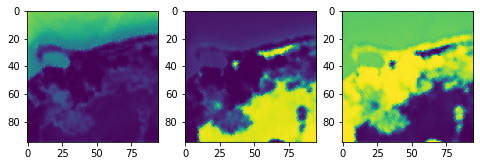

-------------------ALPHA 0.8----------------------
Endmembers cosine similarity: 0.9897513771322511
Endmembers MSE: 0.006743102319970892


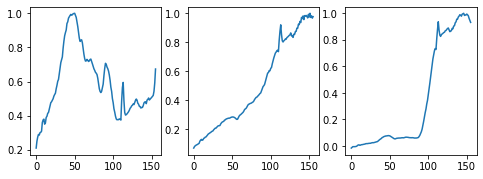

Abundances cosine similarity: 0.955928231387896
Abundances MSE: 0.022019184059764007


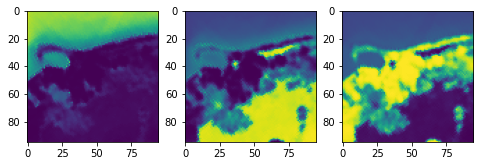

-------------------ALPHA 0.9----------------------
Endmembers cosine similarity: 0.9921848163446632
Endmembers MSE: 0.005168403654990577


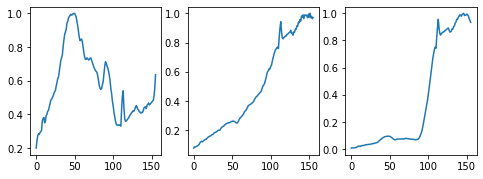

Abundances cosine similarity: 0.9166960737716927
Abundances MSE: 0.04029552207661847


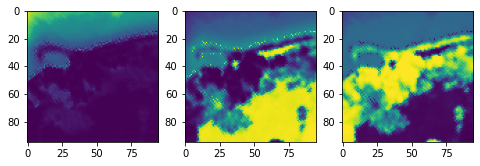

-------------------ALPHA 1----------------------
Endmembers cosine similarity: 0.9966357376151741
Endmembers MSE: 0.0023979931542603816


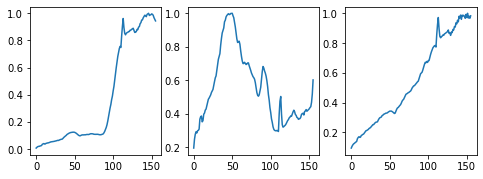

Abundances cosine similarity: 0.9402726502645288
Abundances MSE: 0.03029689038772973


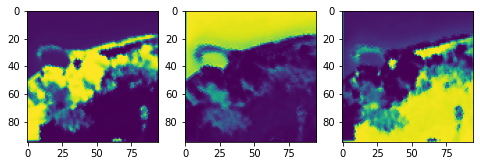

In [12]:
for alpha in [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]:
    print(f"-------------------ALPHA {alpha}----------------------")
    model = Autoencoder(channel_number=samson.n_bands, source_number=samson.n_sources)
    model.load_state_dict(torch.load(f"results/models_weights/9_samson_simple_perturbed_patches_alpha_{alpha}.pth", 
                                     map_location=torch.device('cpu')))
    model.eval()

    X, A, S = model(torch.Tensor(samson.X[None, :, :, :]))
    X, A, S = X.detach().numpy()[0], A.detach().numpy(), S.detach().numpy()[0]

    if name not in results:
        results[name] = {'endmembers': {}, 'abundances': {}}
        
    cos_sim = compare_endmembers(samson, A, metric='cos_sim')
    print('Endmembers cosine similarity:', cos_sim)
    results[name]['endmembers']['cos_sim'] = cos_sim
    mse = compare_endmembers(samson, A, metric='mse')
    print('Endmembers MSE:', mse)
    results[name]['endmembers']['mse'] = mse
    
    plt.figure(figsize=(8,6))
    for ii in range(3): 
        ax = plt.subplot(2, 3, ii+1)
        ax.plot(A[:,ii])
    plt.show()

    cos_sim = compare_abundances(samson, S, metric='cos_sim')
    print('Abundances cosine similarity:', cos_sim)
    results[name]['abundances']['cos_sim'] = cos_sim
    mse = compare_abundances(samson, S, metric='mse')
    print('Abundances MSE:', mse)
    results[name]['abundances']['mse'] = mse
    plt.figure(figsize=(8,6))
    for ii in range(3): 
        ax = plt.subplot(2, 3, ii+1)
        ax.imshow(S[ii, :, :])  
    plt.show()

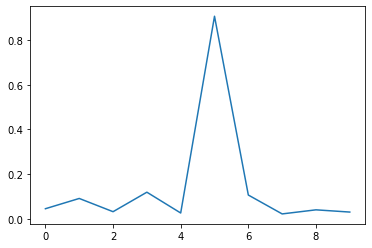

In [18]:
cos_sim = [0.9555699900056751, 0.9923749879301985, 0.9955448428690902, 0.9939511092021993,
          0.9929743899486763, 0.9919027522163105, 0.9928768423409061, 0.9897513771322511,
          0.9921848163446632, 0.9966357376151741]
mse = [0.04529531801085152, 0.09120658736156363, 0.0319712481889846, 0.11924273290100844,
      0.02611567365081981, 0.9066652365342707, 0.10654389637735859, 0.022019184059764007, 
      0.04029552207661847, 0.03029689038772973]

plt.plot(mse)

-------------------MODEL 1----------------------
Endmembers cosine similarity: 0.9936190869866693
Endmembers MSE: 0.004096968733038056


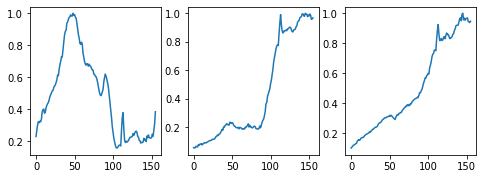

Abundances cosine similarity: 0.7436996226488135
Abundances MSE: 0.13686037662368464


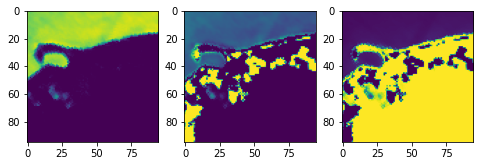

-------------------MODEL 2----------------------
Endmembers cosine similarity: 0.9454008819385141
Endmembers MSE: 0.041026257155003916


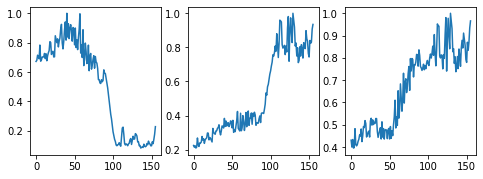

Abundances cosine similarity: 0.8015126042360338
Abundances MSE: 0.10658960767248987


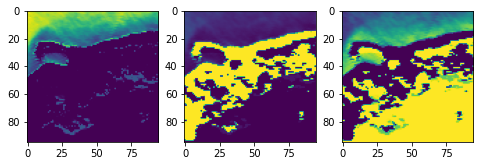

-------------------MODEL 3----------------------
Endmembers cosine similarity: 0.9592318486092398
Endmembers MSE: 0.02949634853267972


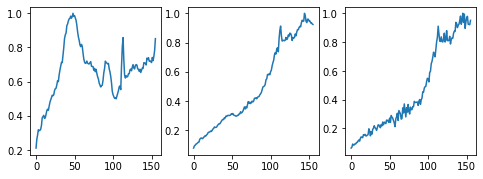

Abundances cosine similarity: 0.7399791074406366
Abundances MSE: 0.13678400908534458


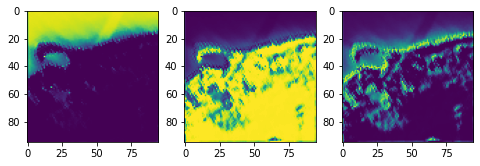

In [9]:
names = ['samson_vae_balance_loss_0.3.pth',
        'samson_vae_balance_loss_0.pth',
        'samson_vae_balance_loss_1.pth']

results = {}


for i, name in enumerate(names):
    print(f"-------------------MODEL {i+1}----------------------")
    model = Autoencoder(channel_number=samson.n_bands, source_number=samson.n_sources)
    model.load_state_dict(torch.load(f"../results/models_weights/{name}", map_location=torch.device('cpu')))
    model.eval()

    X, A, S = model(torch.Tensor(samson.X[None, :, :, :]))
    X, A, S = X.detach().numpy()[0], A.detach().numpy(), S.detach().numpy()[0]

    if name not in results:
        results[name] = {'endmembers': {}, 'abundances': {}}
        
    cos_sim = compare_endmembers(samson, A, metric='cos_sim')
    print('Endmembers cosine similarity:', cos_sim)
    results[name]['endmembers']['cos_sim'] = cos_sim
    mse = compare_endmembers(samson, A, metric='mse')
    print('Endmembers MSE:', mse)
    results[name]['endmembers']['mse'] = mse
    
    plt.figure(figsize=(8,6))
    for ii in range(3): 
        ax = plt.subplot(2, 3, ii+1)
        ax.plot(A[:,ii])
    plt.show()

    cos_sim = compare_abundances(samson, S, metric='cos_sim')
    print('Abundances cosine similarity:', cos_sim)
    results[name]['abundances']['cos_sim'] = cos_sim
    mse = compare_abundances(samson, S, metric='mse')
    print('Abundances MSE:', mse)
    results[name]['abundances']['mse'] = mse
    plt.figure(figsize=(8,6))
    for ii in range(3): 
        ax = plt.subplot(2, 3, ii+1)
        ax.imshow(S[ii, :, :])  
    plt.show()